### 라이브러리 호출

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import KernelPCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# 1. 데이터 불러오기

In [2]:
df = pd.read_excel('./Data/Seed_Data.xlsx')
df

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653248  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0         0.913358      0.007332      0.003147      0.834222      0.998724  
1         0.953861      0.006979      0.003564      0.909851      0.998430  
2         0.908774      0.007244      0.003048      0.825871      0.999066  
3         0.928329      0.007017      0.003215      0.861794      0.994199  
4         0.970516      0.006697      0.003665      0.941900      0.999166  
...            ...           ...           ...           ...           ...  
13606     0.801865      0.006858      0.001749      0.642988      0.998385  
13607     0.822252      0.006688      0.001886      0.676099      0.998219  
13608     0.822730      0.006681      0.001888      0.676884      0.996767  
13609     0.817457      0.006724      0.001852      0.668237      0.995222  
13610     0.784997      0.007001      0.001640      0.616221      0.998180  

[13611 rows x 16 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 1.7 MB


In [4]:
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

# 2. 탐색적 데이터 분석 (EDA)

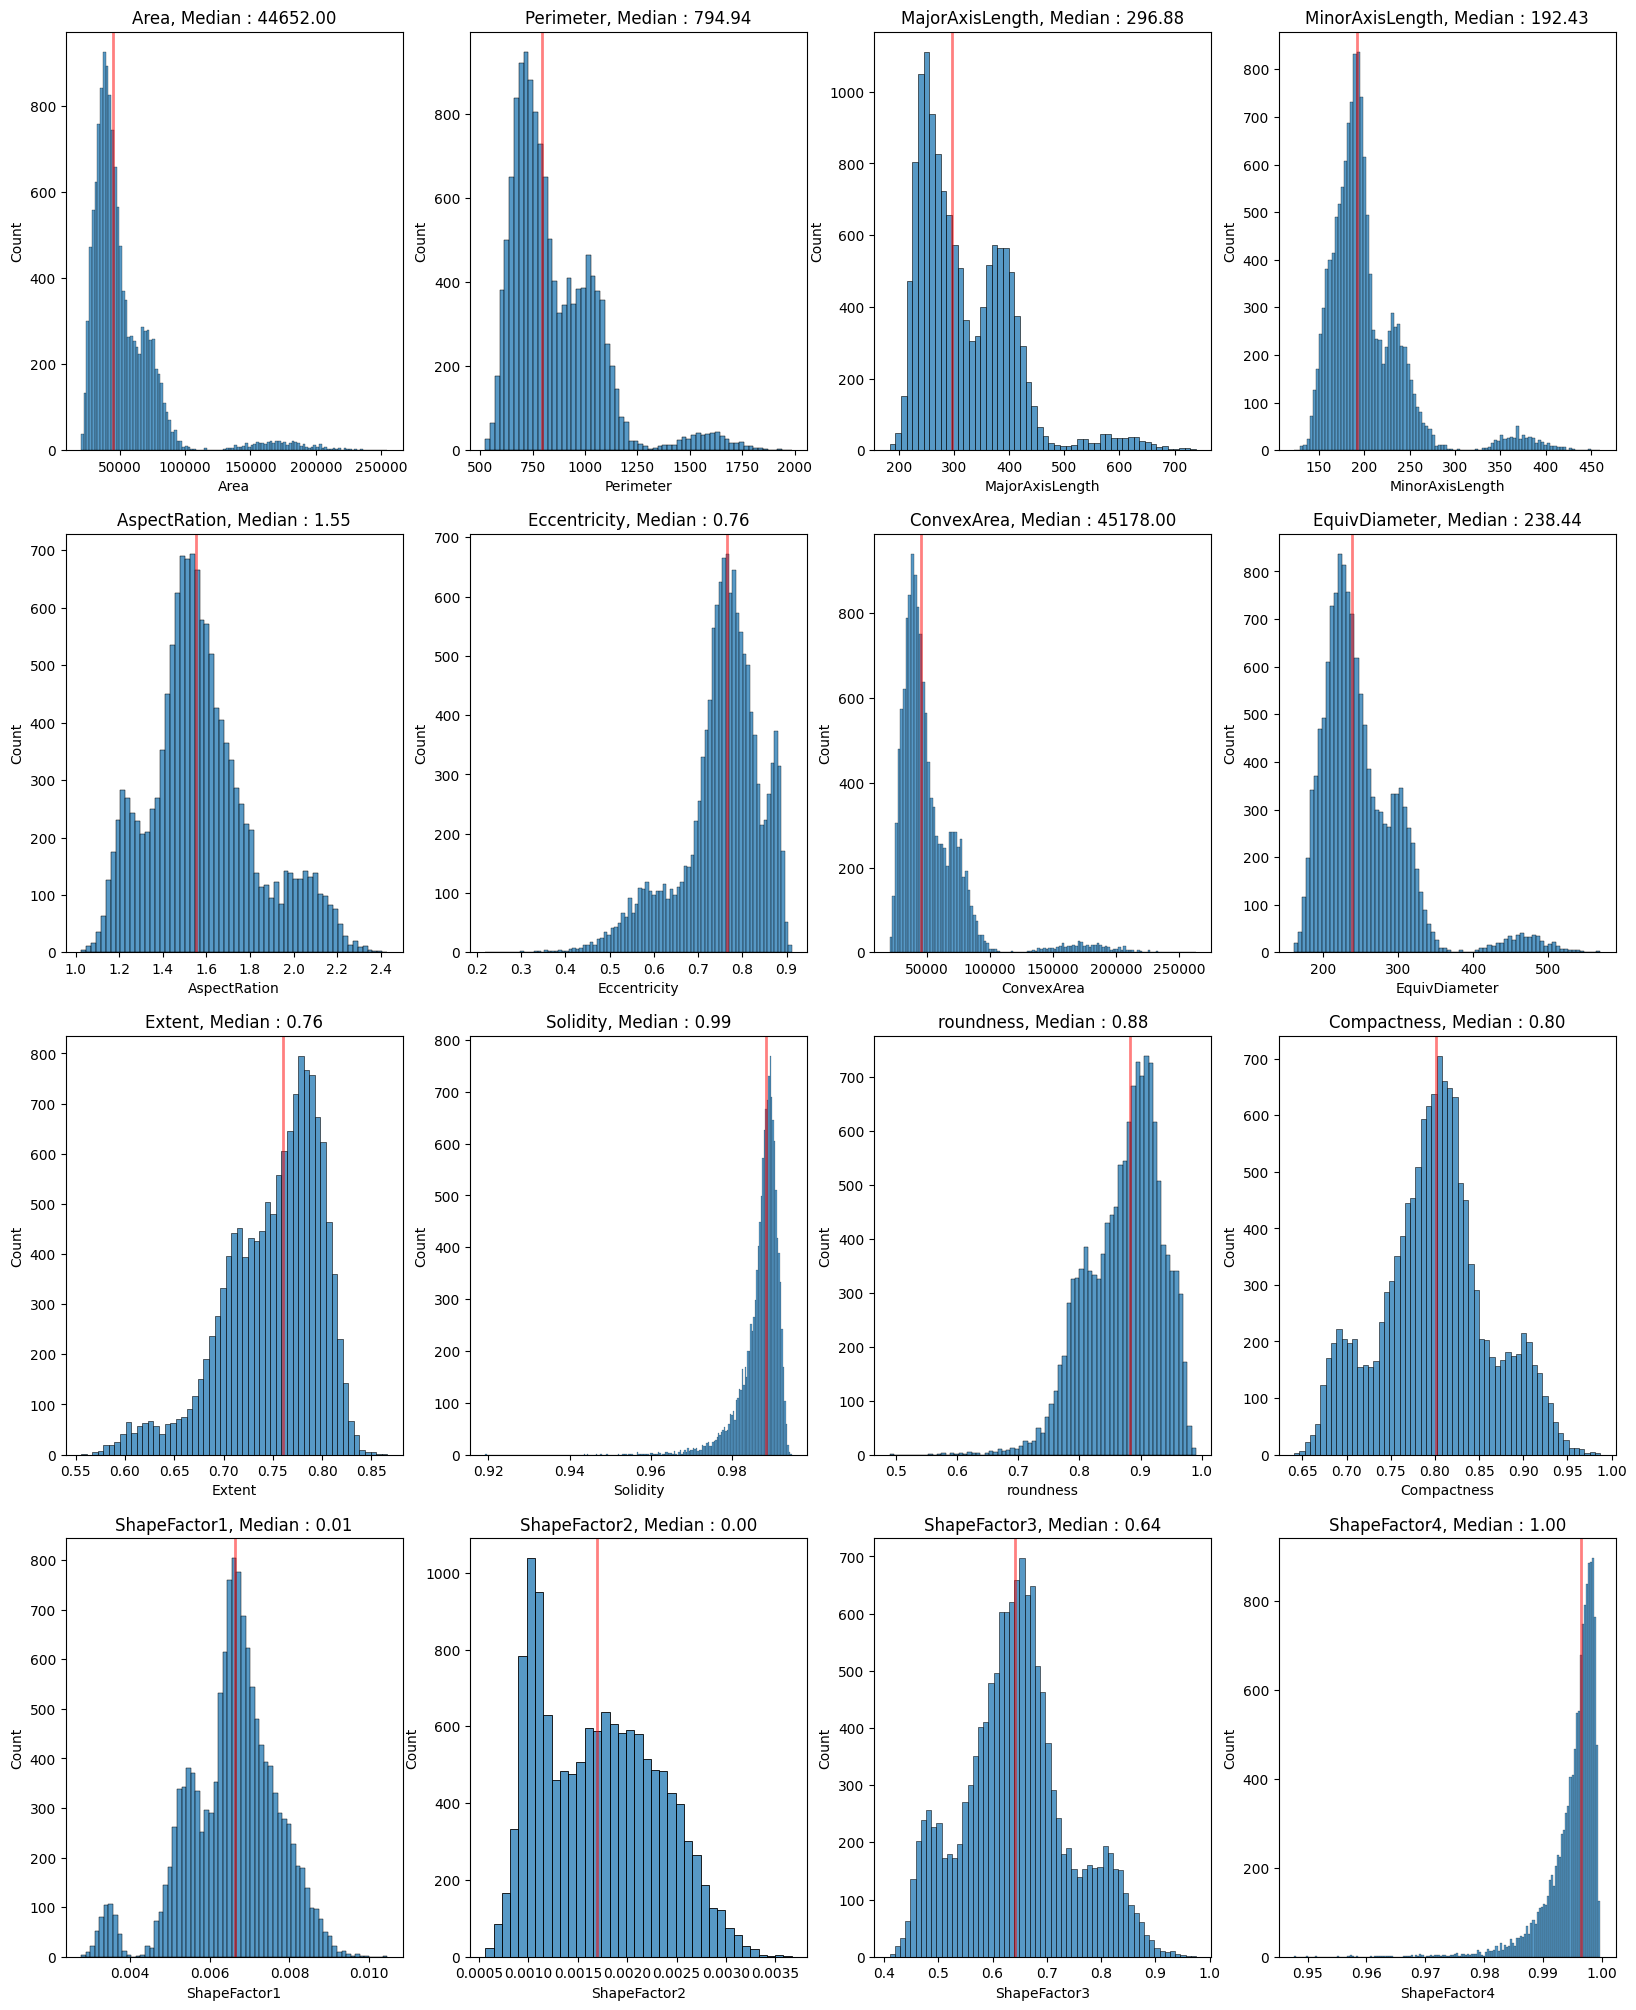

In [5]:
fig, axes = plt.subplots(4, 4, figsize=(20, 25))
for feature, ax in zip(df.columns, axes.flatten()):
    sns.histplot(data=df[feature],ax=ax)
    median = df[feature].median()
    ax.set_title( f'{feature}, Median : {median:0.2f}')
    ax.axvline(median, color ='red', lw=2, alpha=0.5)
plt.show()

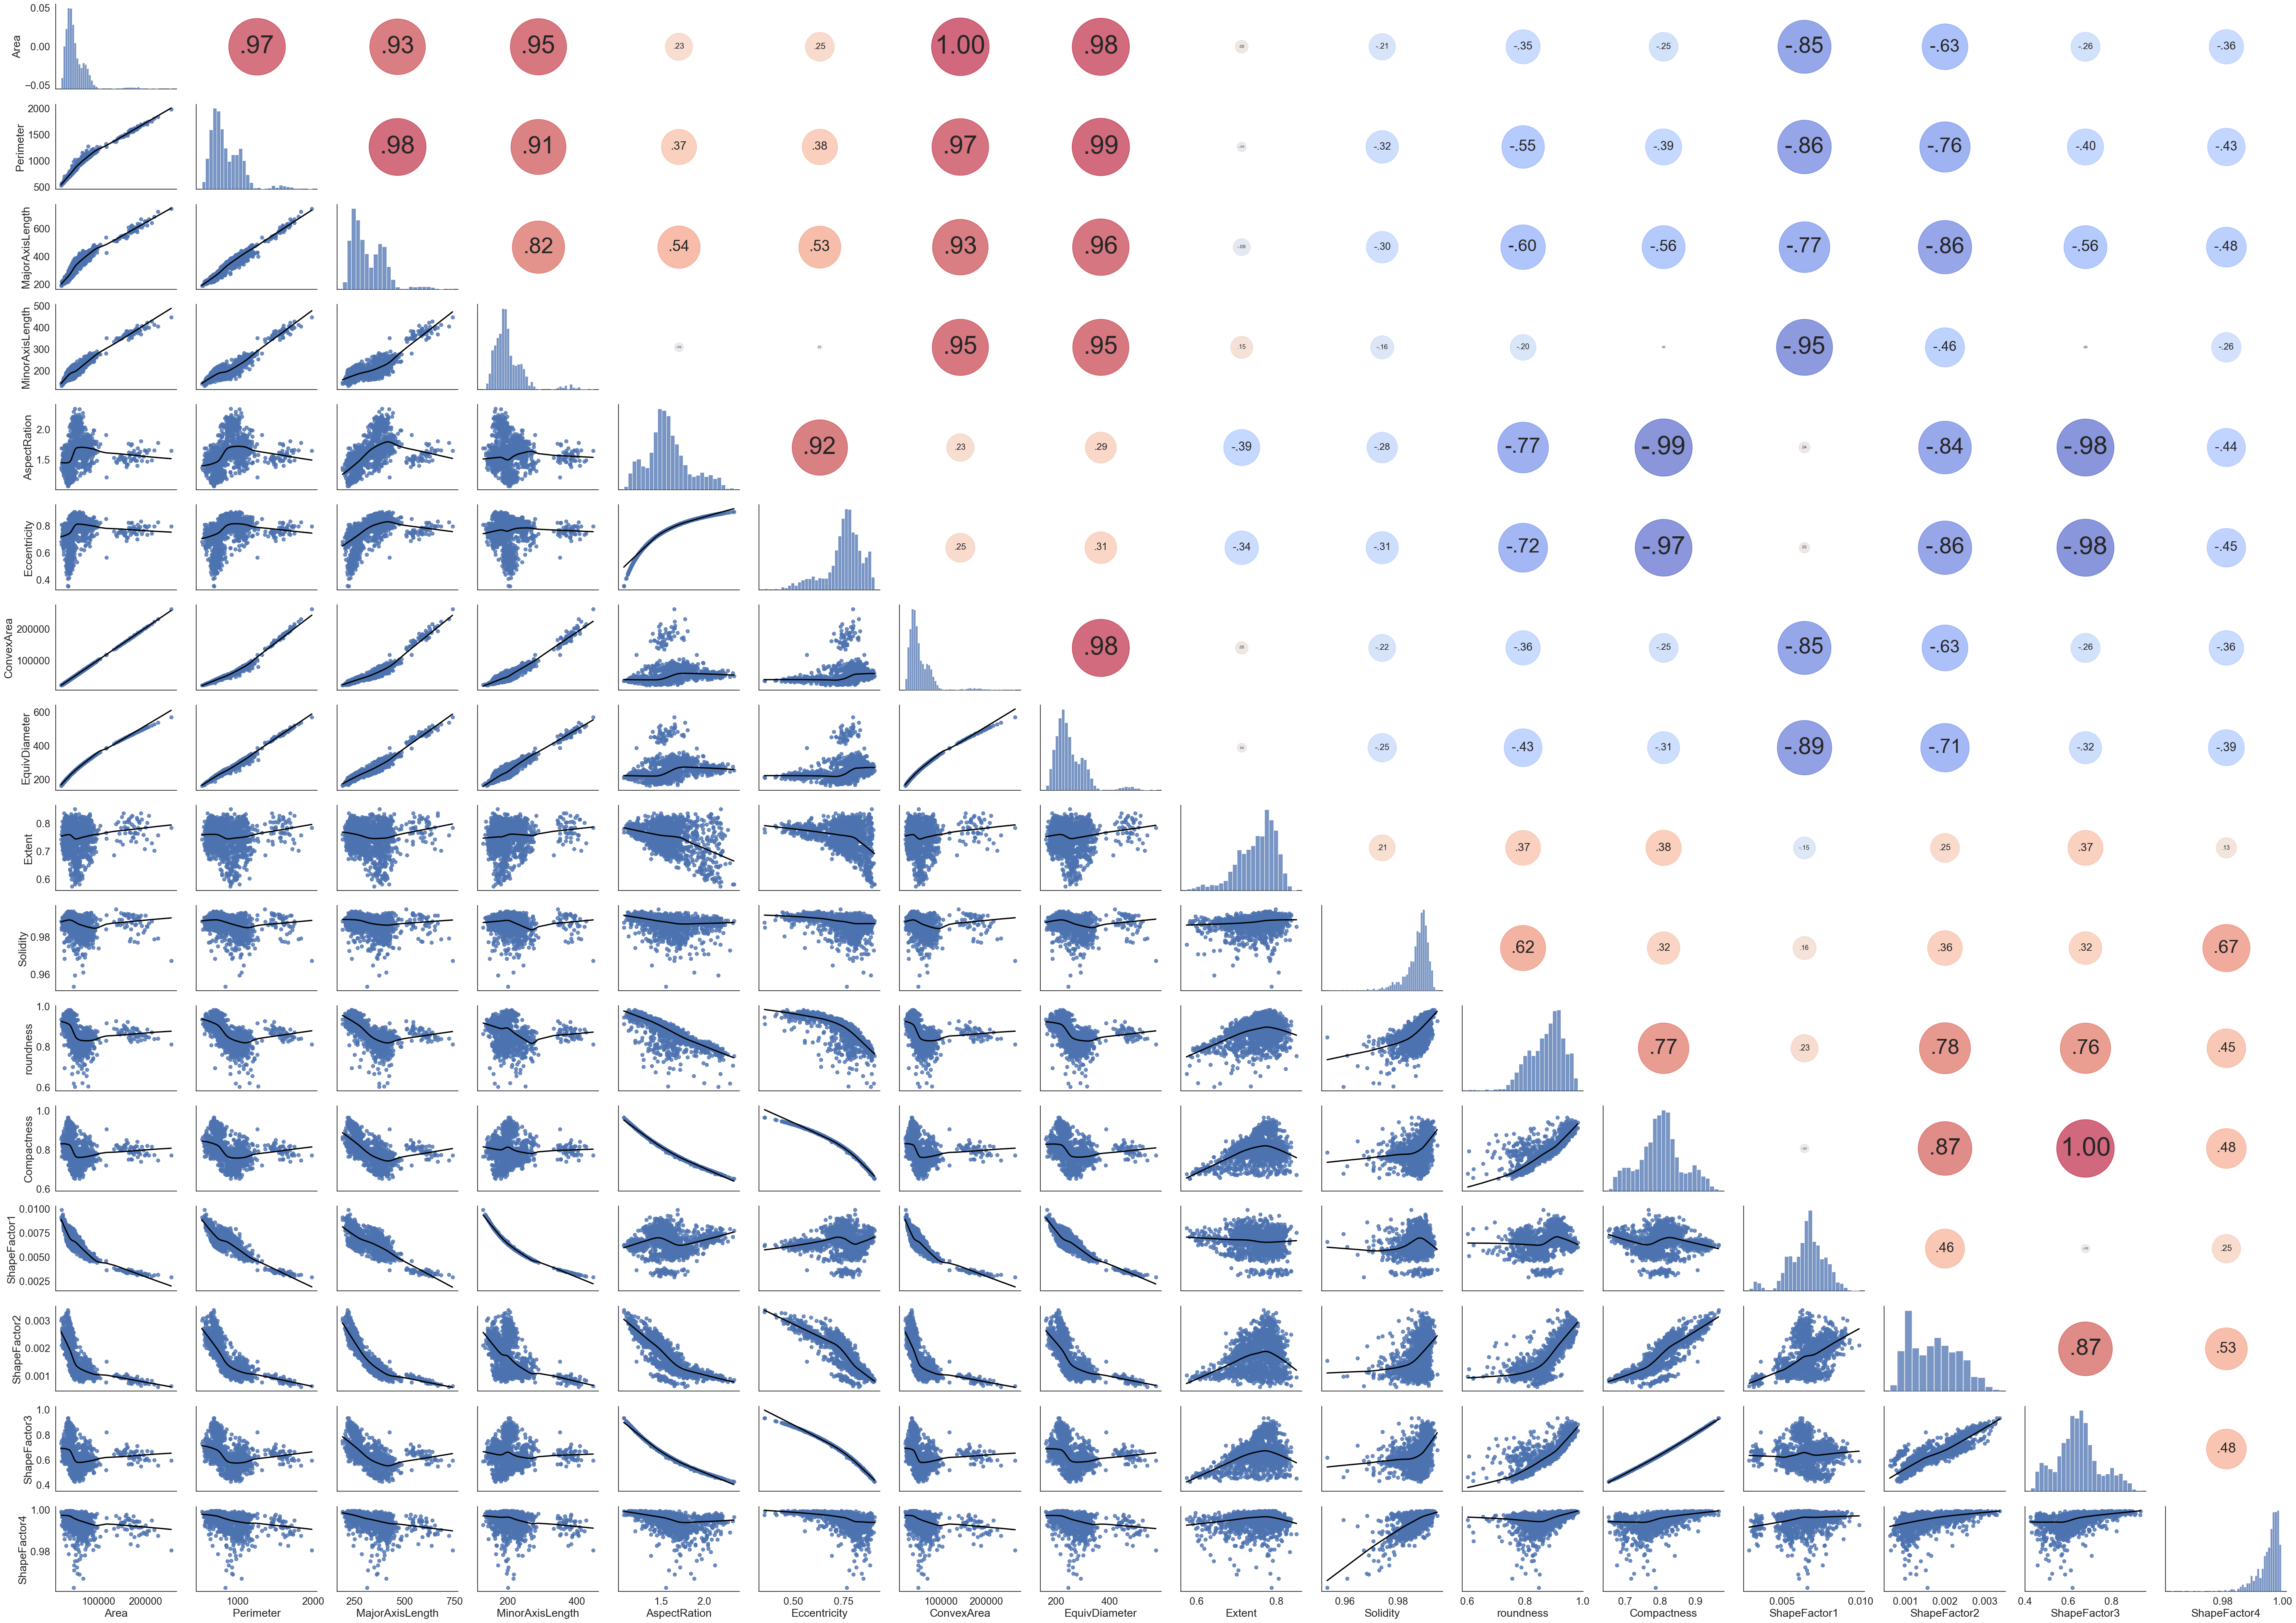

In [6]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(df.iloc[::10], aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.histplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)
plt.show()

# 3. 클러스터링
### 스케일링

In [7]:
scaler = StandardScaler()
df_sc = df.copy()
df_sc[:] = scaler.fit_transform(df)
df_sc

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0     -0.840749  -1.143319        -1.306598        -0.631153     -1.565053   
1     -0.829188  -1.013924        -1.395911        -0.434445     -1.969784   
2     -0.807157  -1.078829        -1.252357        -0.585735     -1.514291   
3     -0.785741  -0.977215        -1.278825        -0.439290     -1.741618   
4     -0.781239  -1.097384        -1.380471        -0.266663     -2.117993   
...         ...        ...              ...              ...           ...   
13606 -0.373471  -0.446083        -0.366669        -0.363055     -0.123703   
13607 -0.373334  -0.456336        -0.450053        -0.257015     -0.432979   
13608 -0.372038  -0.447833        -0.450478        -0.246456     -0.448618   
13609 -0.371765  -0.427029        -0.428974        -0.266742     -0.380735   
13610 -0.371356  -0.387557        -0.291736        -0.446224      0.148374   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0         -2.185720   -0.841451      -1.063341  0.289087  0.367613   1.423867   
1         -3.686040   -0.826102      -1.044217  0.697477 -0.462907   0.231054   
2         -2.045336   -0.808704      -1.008084  0.578195  0.518417   1.252865   
3         -2.742211   -0.773975      -0.973337  0.671260 -2.241767   0.515049   
4         -4.535028   -0.784286      -0.966080  0.476020  0.804772   1.874992   
...             ...         ...            ...       ...       ...        ...   
13606      0.153343   -0.378191      -0.364148 -0.716284  0.684173   0.727872   
13607     -0.165141   -0.378662      -0.363962  1.022933  0.774384   0.818807   
13608     -0.182940   -0.376143      -0.362197 -0.403392  0.591370   0.758468   
13609     -0.106960   -0.372851      -0.361825 -0.903414  0.143717   0.581753   
13610      0.389116   -0.375101      -0.361268  0.799227  0.537539   0.253681   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0         1.839116      0.680786      2.402173      1.925723      0.838371  
1         2.495449      0.367967      3.100893      2.689702      0.771138  
2         1.764843      0.603129      2.235091      1.841356      0.916755  
3         2.081715      0.401718      2.515075      2.204250     -0.197985  
4         2.765330      0.118268      3.270983      3.013462      0.939640  
...            ...           ...           ...           ...           ...  
13606     0.032433      0.261425      0.055630     -0.006086      0.760813  
13607     0.362794      0.110384      0.285117      0.328393      0.722659  
13608     0.370533      0.104269      0.289204      0.336328      0.390251  
13609     0.285098      0.141906      0.228375      0.248973      0.036440  
13610    -0.240904      0.387512     -0.127776     -0.276481      0.713719  

[13611 rows x 16 columns]

### 다중공선성 제거

In [8]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(df_sc, i) for i in range(df_sc.shape[1])]
vif['feature'] = df_sc.columns
vif = vif.sort_values('vif').reset_index(drop=True)
vif

vif          feature
0        1.241536           Extent
1       14.053550         Solidity
2       67.043776     ShapeFactor4
3      104.028512        roundness
4      607.175671     ShapeFactor1
5     1183.004420     Eccentricity
6     1245.330594     ShapeFactor2
7     3573.980197        Perimeter
8    13918.856718     AspectRation
9    77482.673330  MinorAxisLength
10   78552.516774       ConvexArea
11   81390.772240             Area
12   87936.513102  MajorAxisLength
13  200286.806522     ShapeFactor3
14  276769.624251      Compactness
15  314929.768895    EquivDiameter

In [9]:
drop_vif = vif['feature'].values[:13]
df_cleaned = df_sc[drop_vif].copy()

vif2 = pd.DataFrame()
vif2['vif'] = [variance_inflation_factor(df_cleaned, i) for i in range(df_cleaned.shape[1])]
vif2['feature'] = df_cleaned.columns
vif2 = vif2.sort_values('vif').reset_index(drop=True)
vif2

vif          feature
0       1.241496           Extent
1       4.483562     ShapeFactor4
2      11.860301         Solidity
3     101.072255        roundness
4     174.994447     Eccentricity
5     267.614380     ShapeFactor1
6     384.759157     ShapeFactor2
7     413.292151     AspectRation
8    1179.487280  MinorAxisLength
9    2956.319098  MajorAxisLength
10   3435.738859        Perimeter
11  53414.536617       ConvexArea
12  54754.953283             Area

# 차원 축소

In [10]:
kpca = KernelPCA(n_components=4, kernel='rbf')
X_kpca = kpca.fit_transform(df_cleaned)
X_kpca

array([[-0.38199401,  0.58057365,  0.16833527,  0.02669818],
       [-0.08206821,  0.54656327,  0.19244306,  0.02276526],
       [-0.42402205,  0.5761874 ,  0.13338947,  0.03718978],
       ...,
       [-0.35348018, -0.2324164 , -0.18823166,  0.15963191],
       [-0.24304427, -0.30505816, -0.09817768,  0.16975243],
       [-0.19024804, -0.3818327 , -0.20179861,  0.00596827]])

### KMeans 클러스터링

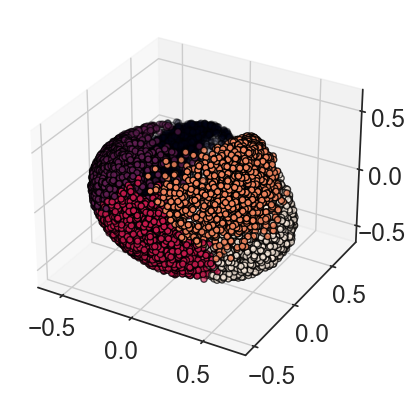

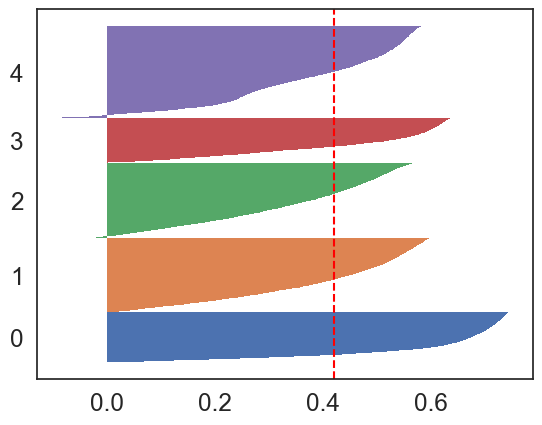

In [16]:
# 모델 생성/학습
best_score = -1
best_model = None
for n in range(3, 10):
    km = KMeans(n_clusters=n, init='random', max_iter=300, n_init=1, random_state=0)
    p = km.fit_predict(X_kpca)
    sil_score = silhouette_score(X_kpca, p, metric='euclidean')
    if best_score < sil_score:
        best_score = sil_score
        best_model = km
        
p = best_model.fit_predict(X_kpca)

# 모델 군집화 결과 시각화
centers = km.cluster_centers_

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_kpca[:, 0], X_kpca[:, 1], X_kpca[:, 2], c=p, edgecolor='black')
plt.show()

# 실루엣 그래프 시각화
vals = silhouette_samples(X_kpca, p, metric='euclidean')
sil_score = silhouette_score(X_kpca, p, metric='euclidean')
labels = np.unique(p)

plt.figure()
y_low = 0
y_high = 0
y_ticks = []
for i in labels:
    ivals = vals[p == i]
    ivals.sort()
    y_high += len(ivals)
    plt.barh(range(y_low, y_high), ivals, height=1, edgecolor='none')
    y_ticks.append((y_low+y_high)/2)
    y_low = y_high
plt.axvline(sil_score, color='red', linestyle='--')
plt.yticks(y_ticks, labels)
plt.show()

In [20]:
%matplotlib qt5

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_kpca[:, 0], X_kpca[:, 1], X_kpca[:, 2], c=p, edgecolor='black')
plt.show()

In [17]:
sil_score

0.4204089326624082

# 4. 클러스터 EDA

In [12]:
df_cluster = df.copy()
df_cluster['species'] = p
df_cluster

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653248  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
1         0.953861      0.006979      0.003564      0.909851      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.970516      0.006697      0.003665      0.941900      0.999166   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

       species  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
13606        2  
13607        2  
13608        2  
13609        2  
13610        4  

[13611 rows x 17 columns]

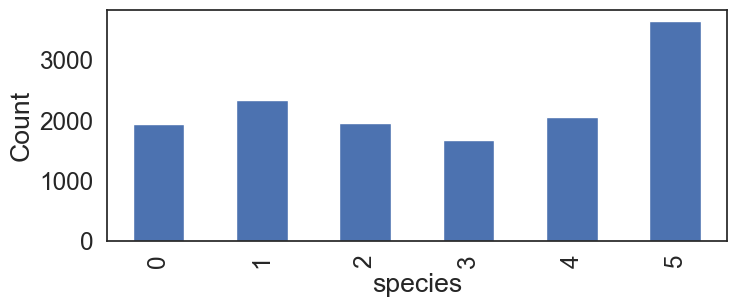

In [13]:
plt.figure(figsize=(8, 3))
df_cluster["species"].value_counts().sort_index().plot(kind='bar')
plt.xlabel('species')
plt.ylabel('Count')
plt.show()

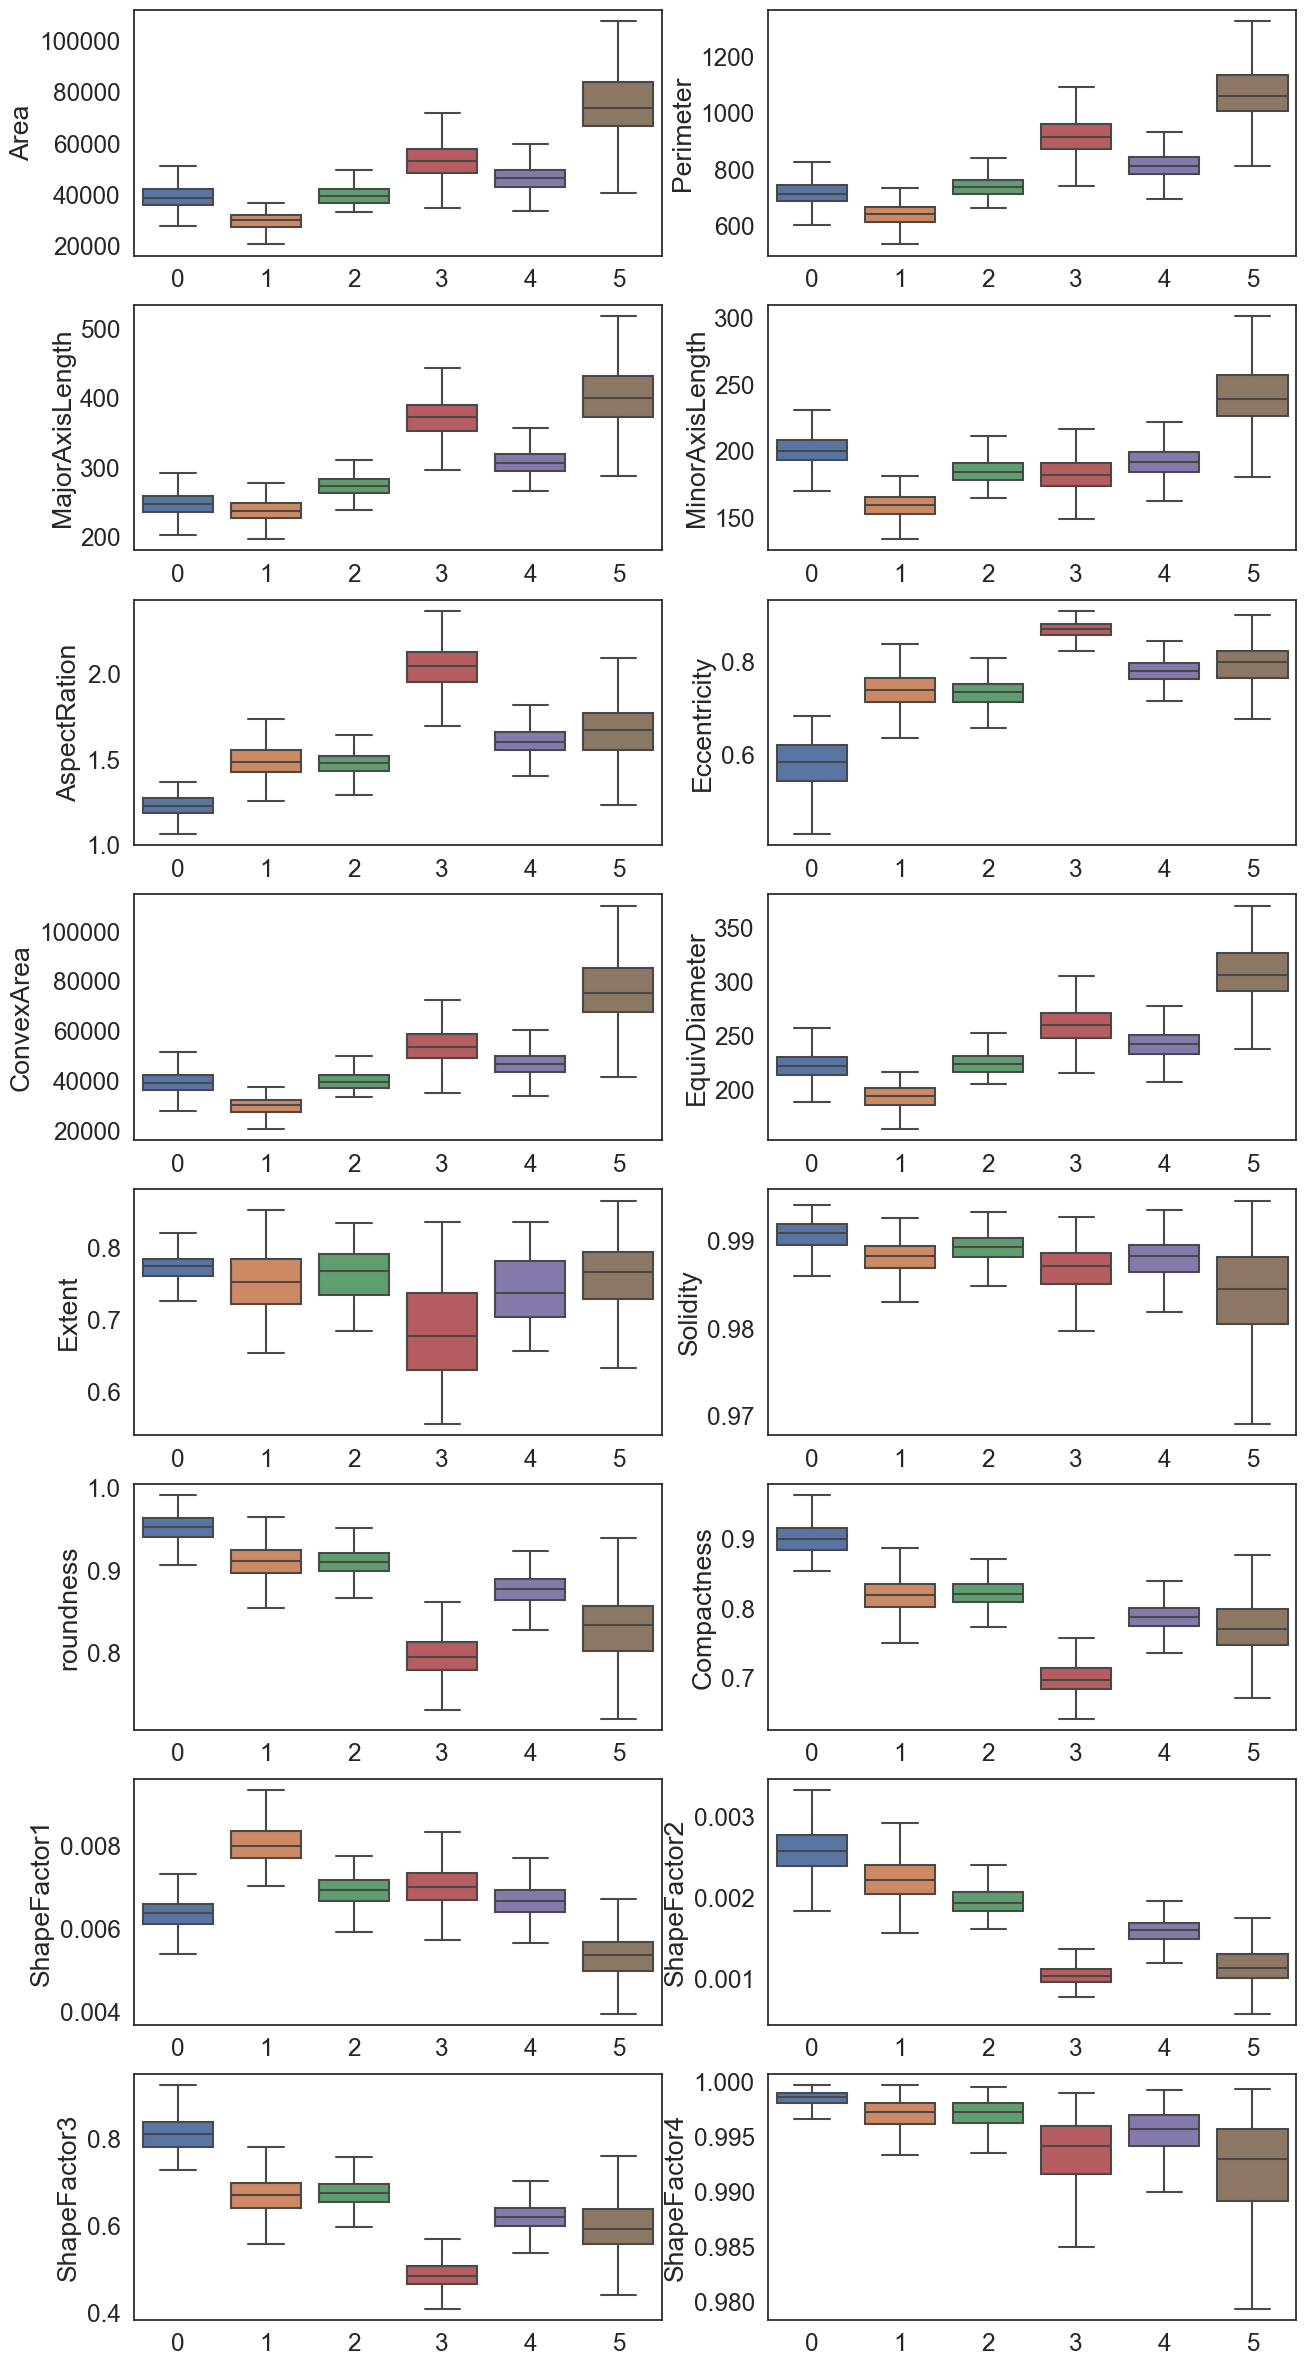

In [14]:
fig, axes = plt.subplots(8, 2, figsize = (15, 30))
for feature, ax in zip(df_cluster.columns.drop("species"), axes.flatten()):
    sns.boxplot(data=df_cluster,
                x="species",
                y=feature,
                showfliers=False,
                ax=ax)
    ax.set(xlabel=None)
plt.show()